### File is used for validating output of thermal data stripping from thermal mp4 renders

[[ 58  74 127 ...  48  49  49]
 [ 55  72 127 ...  48  49  49]
 [ 57  73 135 ...  48  49  49]
 ...
 [ 42  42  39 ...  51  50  50]
 [ 42  42  40 ...  50  51  51]
 [ 41  41  40 ...  51  50  54]]


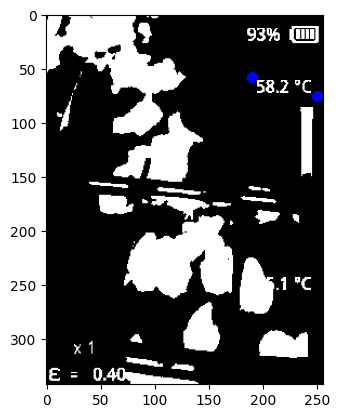

NameError: name 'x2' is not defined

In [61]:
import cv2, pytesseract, re
import numpy as np
import matplotlib.pyplot as plt

def ocr_number(img):
    cfg = r'--psm 7 -c tessedit_char_whitelist=0123456789.-'
    text = pytesseract.image_to_string(img, config=cfg)
    m = re.search(r'-?\d+(?:\.\d+)?', text)
    return float(m.group()) if m else None

cap = cv2.VideoCapture("../../.local_data/midbelt_BW.mp4")
ok, frame0 = cap.read()

x1 = 190
y1 = 57

w1 = 60
h1 = 18

print(frame0[:, :, 0])

plt.imshow(frame0[:, :, 0]>100, cmap='gray')
plt.scatter(w1+x1, y1+h1, s=50, c='blue')
plt.scatter(x1, y1, s=50, c='blue')
plt.show()


# Define ROIs in (x,y,w,h). Do this once; adjust to your overlay.
ROI_HIGH = (x1, y1, w1, h1)
ROI_LOW  = (x2, y2, w2, h2)

results = []
frame_idx = 0
fps = cap.get(cv2.CAP_PROP_FPS) or 30.0

while True:
    ok, frame = cap.read()
    if not ok: break
    x,y,w,h = ROI_HIGH
    hi_roi = frame[y:y+h, x:x+w]
    x,y,w,h = ROI_LOW
    lo_roi = frame[y:y+h, x:x+w]

    # Preprocess
    def prep(roi):
        g = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        g = cv2.GaussianBlur(g, (3,3), 0)
        g = cv2.threshold(g, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
        return g

    hi_val = ocr_number(prep(hi_roi))
    lo_val = ocr_number(prep(lo_roi))

    t = frame_idx / fps
    results.append((frame_idx, t, hi_val, lo_val))
    frame_idx += 1

cap.release()

In [ ]:
import therm_denorm as dnorm

dnorm.